**<font color = 'blue' size = 38> MACHINE LEARNING (Boosting Techniques)</font>**


# <font color = 'Orange'> XGBoost</font>

## <font color = 'Orange'>Classification </font>
link: https://www.kaggle.com/raghupalem/bill_authentication

### <font color = 'Orange'>Data Preparation</font>


In [1]:
import numpy as np 
import pandas as pd 

data = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-06  Machine Learning 2/bill_authentication.csv')


In [2]:
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


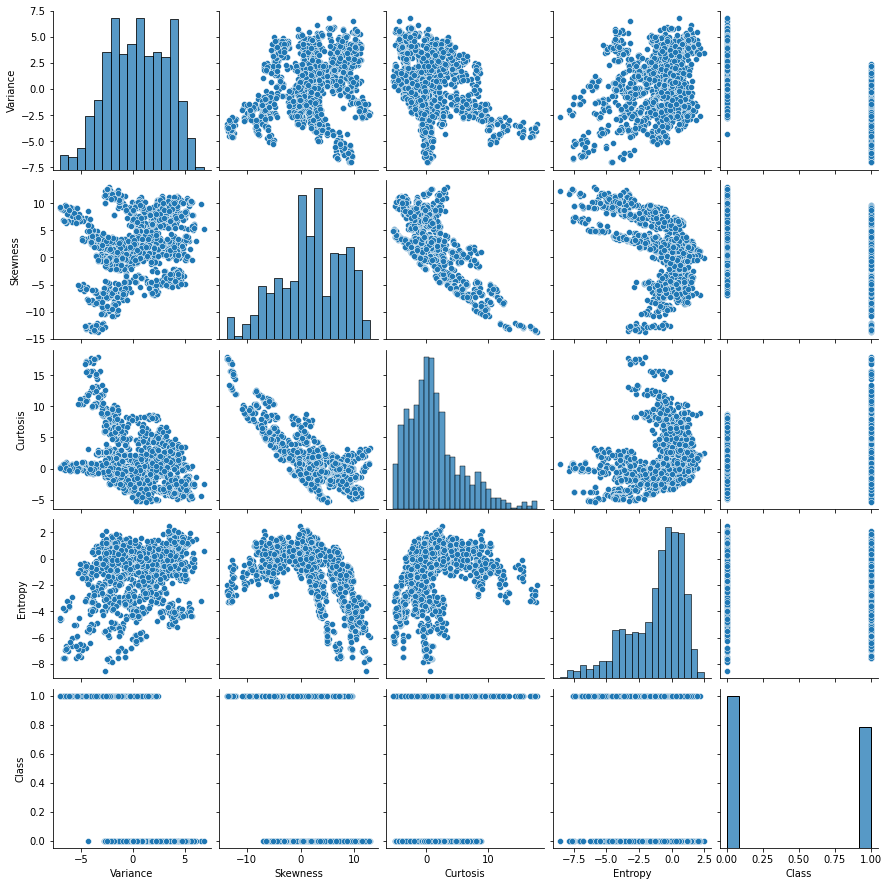

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.pairplot(data)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

### <font color = 'Orange'>Building XGBoost Classification Model</font>

In [5]:
from xgboost import XGBClassifier


#inicialize XGBoost
model = XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,n_jobs=-1 , verbose=1,learning_rate=0.16)

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train)

#make prediction
y_pred = model.predict(X_test)

### <font color = 'Orange'>Evaluating Model</font>

In [6]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.9854545454545455


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[161   1]
 [  3 110]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       162
           1       0.99      0.97      0.98       113

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.98       275
weighted avg       0.99      0.99      0.99       275



## <font color='Orange'>Regression</font>
Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### <font color='Orange'>Data Preparation</font>

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-07 Machine Learning (Boosting Techniques)/train.csv')

In [9]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [10]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

### <font color='Orange'>Building XGBoost Regression Model</font>

In [13]:
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, learning_rate = 0.1,
    max_depth = 5, alpha = 2, n_estimators = 10)

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)



[21:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### <font color = 'Orange'>Evaluating Model</font>

In [14]:
from sklearn.metrics import mean_absolute_error
import numpy as np
print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))

Mean Absolute Error : 251.92658342334497


### <font color = 'Orange'>k-fold Cross Validation using XGBoost</font>

In [15]:
from xgboost import cv, DMatrix


data_dmatrix = DMatrix(data=X,label=y)



params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[21:13:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,179033.968750,650.675751,179071.536458,1558.739525
1,162358.500000,623.335527,162872.739583,1440.274536
2,147449.661458,717.930424,148259.156250,812.789874
3,133987.661458,590.026949,135161.968750,730.897987
4,121795.273437,463.116471,123460.062500,766.995133


In [17]:
print((cv_results["test-rmse-mean"]).tail(1))


49    30368.595703
Name: test-rmse-mean, dtype: float64


### <font color='Orange'>Visualize Boosting Trees and Feature Importance</font>

In [18]:
from xgboost import train

xg_reg = train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[21:13:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


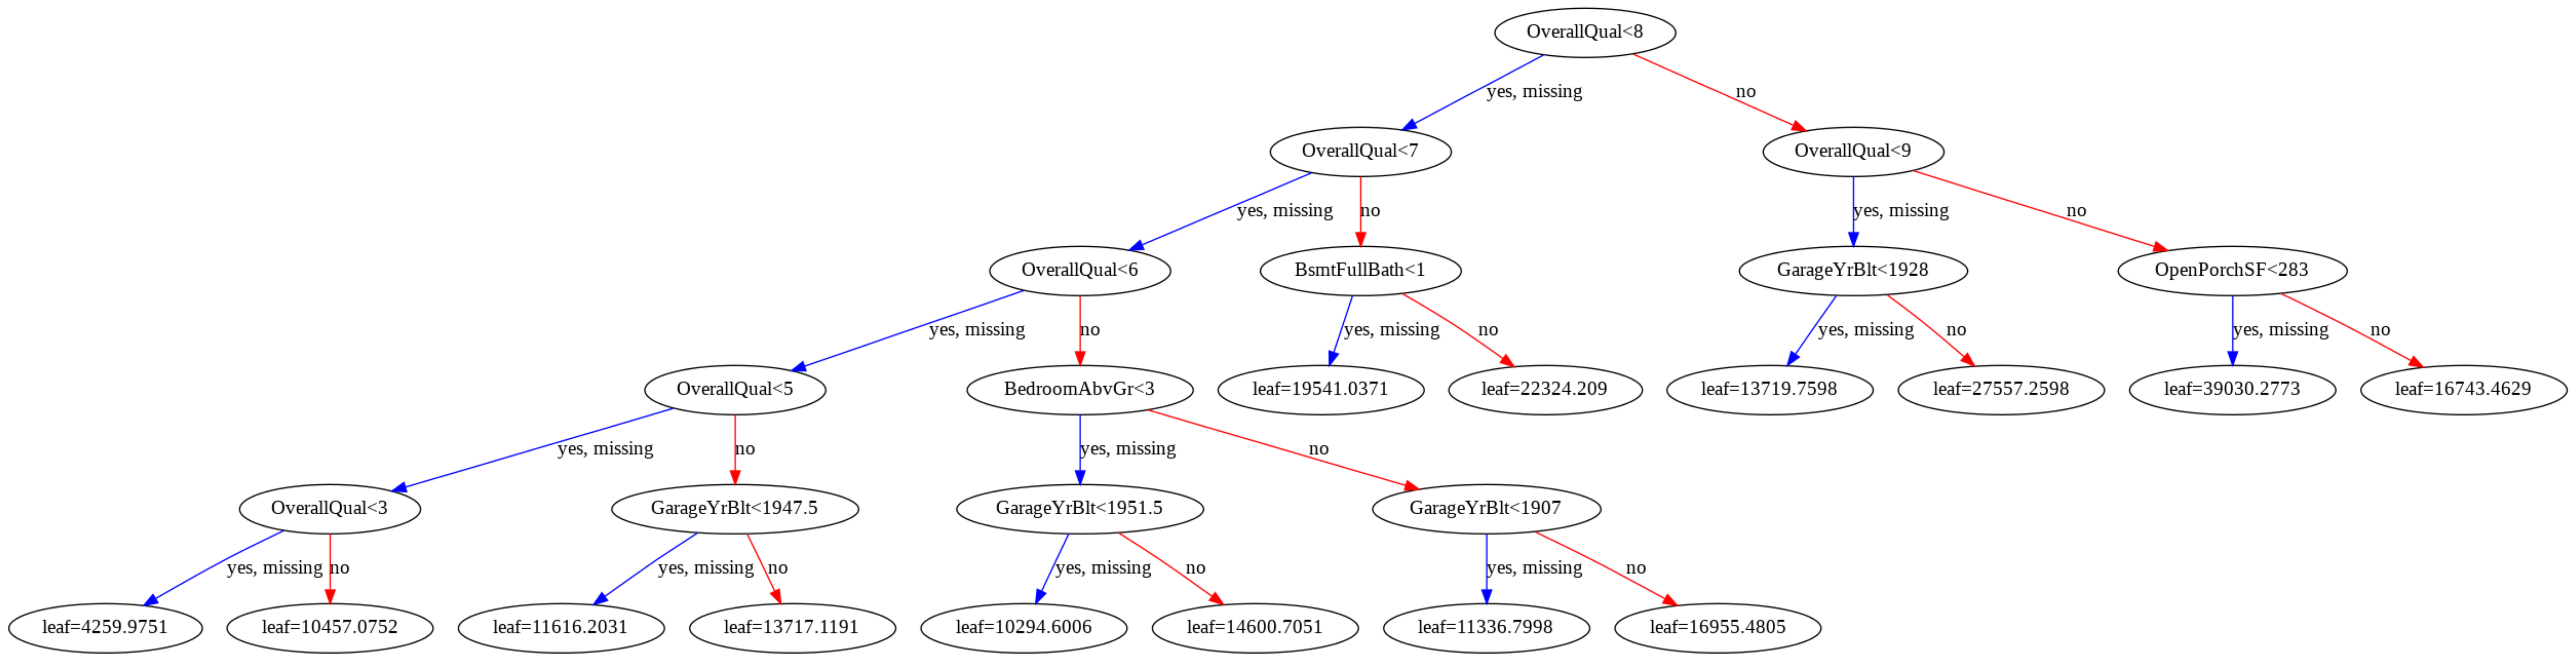

In [49]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

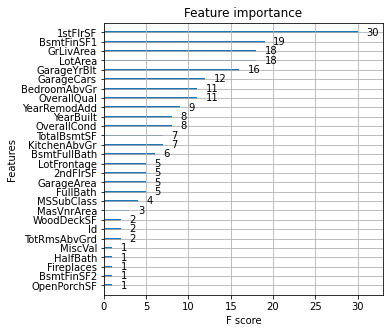

In [51]:
from xgboost import plot_importance

plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

# <font color = 'Orange'>LGBM </font>

## <font color = 'Orange'>Classification </font>
link: https://www.kaggle.com/raghupalem/bill_authentication

### <font color = 'Orange'>Data Preparation</font>


In [21]:
import numpy as np 
import pandas as pd 

data = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-06  Machine Learning 2/bill_authentication.csv')


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

### <font color = 'Orange'>Building LGBM Classification Model</font>

In [23]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()

clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

### <font color = 'Orange'>Evaluating Model</font>

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[154   0]
 [  1 120]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       154
           1       1.00      0.99      1.00       121

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



## <font color='Orange'>Regression</font>
Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### <font color='Orange'>Data Preparation</font>

In [25]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-07 Machine Learning (Boosting Techniques)/train.csv')

In [26]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

### <font color='Orange'>Building LGBM Regression Model</font>

In [29]:
from lightgbm import LGBMRegressor

LGBM = LGBMRegressor(n_estimators = 1000)

LGBM.fit(X_train,Y_train)

y_pred = LGBM.predict(X_test)

### <font color = 'Orange'>Evaluating Model</font>

In [30]:
from sklearn.metrics import mean_absolute_error
import numpy as np
print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))

Mean Absolute Error : 133.7040174784426


# <font color = 'Orange'>CatBoost</font>

## <font color = 'Orange'>Classification </font>
link: https://www.kaggle.com/raghupalem/bill_authentication

### <font color = 'Orange'>Data Preparation</font>


In [31]:
import numpy as np 
import pandas as pd 

data = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-06  Machine Learning 2/bill_authentication.csv')


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

### <font color = 'Orange'>Building CatBoost Classification Model</font>

In [33]:
!pip install catboost

     |████████████████████████████████| 66.3MB 58kB/s 


In [34]:
from catboost import CatBoostClassifier
from random import seed

cb_model= CatBoostClassifier(loss_function='Logloss',
          eval_metric='AUC',
          verbose= 200,
          random_seed= seed(1))

cb_model.fit(X_train,Y_train)

Learning rate set to 0.010718
0:	total: 50.5ms	remaining: 50.5s
200:	total: 422ms	remaining: 1.68s
400:	total: 818ms	remaining: 1.22s
600:	total: 1.18s	remaining: 785ms
800:	total: 1.55s	remaining: 386ms
999:	total: 1.92s	remaining: 0us


In [35]:
y_pred = cb_model.predict(X_test)

### <font color = 'Orange'>Evaluating Model</font>

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[142   1]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       143
           1       0.99      1.00      1.00       132

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



## <font color='Orange'>Regression</font>
Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### <font color='Orange'>Data Preparation</font>

In [37]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-07 Machine Learning (Boosting Techniques)/train.csv')

In [38]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

### <font color='Orange'>Building CatBoost Regression Model</font>

In [41]:
from catboost import CatBoostRegressor


cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

cb_model.fit(X_train, Y_train)

0:	learn: 78432.0114339	total: 65.3ms	remaining: 32.6s
50:	learn: 27091.9399963	total: 2.29s	remaining: 20.1s
100:	learn: 17154.8988858	total: 4.55s	remaining: 18s
150:	learn: 13229.2364896	total: 6.78s	remaining: 15.7s
200:	learn: 10959.0072134	total: 9.12s	remaining: 13.6s
250:	learn: 8905.3678780	total: 11.6s	remaining: 11.5s
300:	learn: 7270.4139250	total: 14s	remaining: 9.22s
350:	learn: 5931.6308905	total: 16.4s	remaining: 6.97s
400:	learn: 4981.7909023	total: 18.7s	remaining: 4.62s
450:	learn: 4064.2007123	total: 21.1s	remaining: 2.29s
499:	learn: 3368.0317417	total: 23.4s	remaining: 0us


In [42]:
y_pred = cb_model.predict(X_test)

### <font color = 'Orange'>Evaluating Model</font>

In [43]:
from sklearn.metrics import mean_absolute_error
import numpy as np
print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))

Mean Absolute Error : 129.9858569027317


# <font color = 'Orange'>Naive Bayes Classification</font>
link: https://www.kaggle.com/raghupalem/bill_authentication

## <font color = 'Orange'>Data Preparation</font>


In [44]:
import numpy as np 
import pandas as pd 

data = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-06  Machine Learning 2/bill_authentication.csv')


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

## <font color = 'Orange'>Building Classification Model</font>

In [46]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train)

#Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild


## <font color = 'Orange'>Evaluating Model</font>

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[141  13]
 [ 27  94]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       154
           1       0.88      0.78      0.82       121

    accuracy                           0.85       275
   macro avg       0.86      0.85      0.85       275
weighted avg       0.86      0.85      0.85       275

